### Лабораторная работа №4. Регрессия временных рядов
Выполнили студенты: Петренко Людмила М33001, Кусайкина Елизавета М33001, Шалимов Иван М33021

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
class AR_3:
    def __init__(self):
        self.coefs = [0.7, -0.3, -0.2] #self.generate_coefs()

    def generate(self, n: int):
        start_series = np.random.rand(1, 3)[0]
        series = [i for i in start_series]
        
        # генерируем следующие n значений
        mu = 0
        sigma = np.std(series)
        self.error = np.random.normal(mu, sigma, n)
        for i in range(n):
            series.append(1 + np.dot(np.array(self.coefs), np.array([series[a] for a in range(i - 2, i + 1)])) + self.error[i])
        return series
    
    # генерируем корни характеристического многочлена > 1 и затем коэффициенты по ним
    def generate_coefs(self):
        random = np.array(np.random.rand(1, 3)[0])
        random = [abs(rand) + 1 for rand in random]
        coefs = [-i for i in np.poly(random)]
        return coefs
    
    def check_stationarity(self) -> bool:
        roots = np.roots([-self.coefs[i - 1] if i != 0 else 1 for i in range(len(self.coefs) + 1)])
        if all(abs(roots) > 1):
            return False
        else:
            return True

In [106]:
ar = AR_3()
print('ряд стационарен? ', ar.check_stationarity())
timeseries = pd.DataFrame({'series': ar.generate(1000)})
timeseries

ряд стационарен?  True


,series
0,0.806517
1,0.611187
2,0.960683
3,0.935874
4,1.034775
...,...
998,1.220625
999,0.962818
1000,0.996754
1001,0.971437


In [107]:
from statsmodels.tsa.stattools import adfuller

# проверка на стационарность
def stationary_test_fuller(timeseries):
    p_value = adfuller(timeseries[1:])[1]
    print('ряд не стационарный' if round(p_value, 4) > 0.05 else 'ряд стационарный')


stationary_test_fuller(timeseries)

ряд стационарный


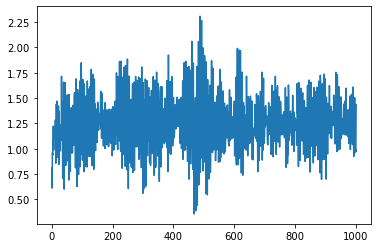

In [108]:
plt.plot(timeseries)

In [109]:
n = 1000
timeseries['1'] = timeseries['series']
timeseries['2'] = timeseries['series']
timeseries['3'] = timeseries['series']
timeseries['target'] = timeseries['series']

# выделим target переменную
for i in range(0, n):
    timeseries['1'].iloc[i] = timeseries['series'].iloc[i]
    timeseries['2'].iloc[i] = timeseries['series'].iloc[i + 1]
    timeseries['3'].iloc[i] = timeseries['series'].iloc[i + 2]
    timeseries['target'].iloc[i] = timeseries['series'].iloc[i + 3]

timeseries = timeseries[:1000]

In [110]:
timeseries = timeseries.drop(columns=['series'])
timeseries.to_csv('generated_timeseries_final.csv')

In [118]:
df = pd.read_csv('generated_timeseries_final.csv', index_col=0)

In [119]:
df

,1,2,3,target
0,0.806517,0.611187,0.960683,0.935874
1,0.611187,0.960683,0.935874,1.034775
2,0.960683,0.935874,1.034775,1.222354
3,0.935874,1.034775,1.222354,0.987985
4,1.034775,1.222354,0.987985,1.215371
...,...,...,...,...
995,1.059139,1.178635,1.503492,1.220625
996,1.178635,1.503492,1.220625,0.962818
997,1.503492,1.220625,0.962818,0.996754
998,1.220625,0.962818,0.996754,0.971437


In [120]:
# разделим данные на обучающую и тренировочную выборки
df.sort_index(inplace=True)
size = len(df)
df_train = df.iloc[:round(size*0.8) + 1]
df_test = df.iloc[round(size*0.8):]

train_x, train_y = df_train.drop(columns=['target']), pd.Series(df_train['target'])
test_x, test_y = df_test.drop(columns=['target']), pd.Series(df_test['target'])

{'degree': 1, 'epsilon': 0.1, 'gamma': 'auto'}
0.1447898700990658


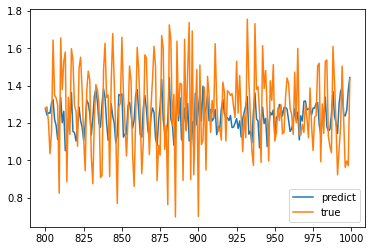

In [122]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

baseline_model = SVR(kernel='poly')
parameters = {'epsilon': [1, 0.1, 0.01, 0.05, 0.001], 'gamma': ['scale', 'auto'], 'degree': [1, 2, 1.5, 3, 2.5]}
clf = GridSearchCV(baseline_model, param_grid=parameters, cv=5)
clf.fit(train_x, train_y)
model = SVR(kernel='poly', degree=clf.best_params_['degree'], epsilon=clf.best_params_['epsilon'], gamma=clf.best_params_['gamma'])
print(clf.best_params_)
model.fit(train_x, train_y)
predictions = model.predict(test_x)
errors = np.array(abs(predictions - test_y)/test_y)
print(errors.mean())
plt.plot(test_y.index, predictions, label='predict')
plt.plot(test_y.index, test_y, label='true')
plt.legend()

0.14262901115547522


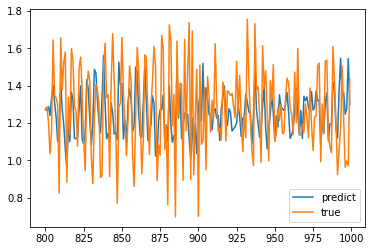

In [157]:
model = SVR(kernel='rbf', epsilon=0.00001, gamma='scale')
model.fit(train_x, train_y)
predictions = model.predict(test_x)
errors = np.array(abs(predictions - test_y)/test_y)
print(errors.mean())
plt.plot(test_y.index, predictions, label='predict')
plt.plot(test_y.index, test_y, label='true')
plt.legend()

In [ ]:
'rbf', 'sigmoid'